# Homework 1: Supervised Learning 1: Lab Questions
### 25 points total
### Version 1.0



Wencheng Zhong (wzhong10), Jiarui Wang (jwang486)

**Instructions:**
This notebook is intended to guide you through creating and exploring your dataset. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete. All questions can be answered in 1-4 sentences, unless otherwise noted.

## Part 1: Defining the Problem and Choosing a Dataset
Things to do in this part:
1. Answer questions 1-4
2. Identify data sources to use in your dataset
3. List data sources used in question 5

Your first task is to choose a problem you're interested in. You are free to choose from any domain, but it should be within the **supervised learning** paradigm. In other words, a supervised classifier should be able to generalize from a training sample of $(X,y)$ pairs to predict outcomes on unseen data $x$. We want to use machine learning, so your problem should be difficult to solve using traditional programming algorithms. 

For simplicity, you will construct data for a binary or multiclass classification problem, where the possible labels are given by a fixed set of choices, or for a regression task (real-valued labels). Do not build a dataset for a structured prediction task.


#### 1) In one or two sentences, what are you interested in predicting given what data? This is your supervised learning problem.

You should answer this question before creating your dataset, as it will provide an indication of what to search for.

<font color='blue'>
    I'm interested in how dangerous/how severe we will get if we have a car accident in Maryland, given  previous crashes data within Maryland state. 
</font>

#### 2) Is this a well-defined problem? Why or why not? What ambiguities (if any) exist in your problem?

Think about what challenges you solved by formulating the problem in this way.

<font color='blue'>
    Yes. It is well-defined. Our goal is to get some insight into the story behind those crashes data and therefore learn some important experience or recognize some significant patterns to enhance our future learning in this area. We will use some mathemtical models, given our dataset, to train our model and finally draw a consluion based on our training results. The whole process is clear and well-defined.
</font>

#### 3) Does an easy (non-ML) solution exist for the problem? What are existing ways this problem, or a similar problem, is addressed (regardless of difficulty)?

<font color='blue'>
    No, there is no easy solution for this problem. Similar problem could be the survey(quote) that used by car insurance company to quote your car insurance price. 
</font>

#### 4) Why is using machine learning for this problem justified?

<font color='blue'>
    Because the dataset might be too large for human brain to analyze(In raw dat there are over 1 million sample points); also we want a clear evaluation procedure and quantitative reasoning for our final decision, which is more convincing than non-ML method. 
</font>

Now, we'll turn to data we can use to actually solve your problem. You may wish to use Section 3.1 of the assignment sheet for inspiration. **Remember, you are expected to *create* a dataset, not use an existing one**.

#### 5) List the sources for all data you used when creating your dataset along with (very briefly) what you obtained from it.

For example: <br /> Obtained features a,b,c from http://www.domain1.com/example_data. <br /> Obtained labels from http://www.domain2.com/example_labels.

<font color='blue'>
    Obtained features WEATHER_CODE,  AIRBAG_DEPLOYED,  SAF_EQUIP_CODE,  COLLISION_TYPE_CODE from https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes/65du-s3qu and https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf <br />
    Obtained label INJ_SEVER_CODE from https://opendata.maryland.gov/Public-Safety/Maryland-Statewide-Vehicle-Crashes-Person-Details-/py4c-dicf

    It is the car accident data in Maryland state from January 2015 through September 2021.
</font>

## Part 2: What does the data look like?
Things to do in this part:
1. Answer questions 6-11
2. Print a few examples of raw data (if possible) otherwise explain what the raw data looks like.
3. Create at least 3 numerical features from your raw data
4. Create dataset such that $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ are both numpy arrays
5. Create 1 visual that helps you understand your data.

Let's take a look at the various data you've collected. First let's read in the raw data. You may read the data into whatever is most convenient (e.g. a list, a numpy array, a Pandas dataframe, etc.). **At this point your data will be in whatever format you downloaded them in**. For example, if you're working with text data, your data might be strings of words or collection of text documents. If you are working with image data, you might have a collection of images.
<br /><br />
For those of you new to working with data in Python, we have included examples of how to import the raw data. These are merely suggestions if they work for you. You don't have to use them.

In [14]:
# # Suppose you have a directory called documents that contains Wikipedia articles, you can process these as follows:
# # Cleaning the data (e.g. removing stop words) is not required.
# import os
# from collections import defaultdict

# files = [f for f in os.listdir('documents') if os.path.isfile(os.path.join('documents', f))
# X = defaultdict(list)
# for i, file in enumerate(files[:len(files)], start=1):
#     with open(os.path.join('documents', file)) as f:
#         X['doc_' + str(i)] = f.readlines()
# # X is a dictinary that maps doc_id to text.

# # Suppose you have labels that are stored in a CSV file:
# import pandas as pd

# y = pd.read_csv('labels.csv')
# # y is a Pandas dataframe that contains each label.

# # Suppose you have a directory called images that contains pictures of cats, you can process them as follows:
# from PIL import Image

# images = [f for f in os.listdir('images') if os.path.isfile(os.path.join('images', f))
# X = [Image.open(image) for image in images]
# # X is a list of PIL Image objects

#######################################################
# TODO: Read in your raw data
import pandas as pd

crash = pd.read_csv('crash.csv')
crash2 = pd.read_csv('crash.csv')
X_raw = pd.concat([crash,crash2],axis=1)
y = pd.read_csv('Y.csv')

#######################################################

Now, let's print a few examples. Depending on your data format, you may have to write this yourself. We have provided some examples below.

In [15]:
# # If your data is stored in an array:
# print('X:', X[:5])
# print('y:', y[:5])

# # If your data consists of image files:
# from PIL import Image

# for i in range(5):
#     print('image:')
#     img = X[i]
#     img.show()
#     print('label:', y[i])

#######################################################
# TODO: print out what a few examples of your raw data.
print('X:', X_raw[:5])
print('y:', y[:5])
#######################################################

X:    YEAR QUARTER LIGHT_DESC  LIGHT_CODE     COUNTY_DESC  COUNTY_NO  MUNI_DESC  \
0  2020      Q2   Daylight        1.00       Baltimore          3        NaN   
1  2020      Q2        NaN        6.02  Baltimore City         24        NaN   
2  2020      Q2   Daylight        1.00      Montgomery         15        NaN   
3  2017      Q2   Daylight        1.00  Baltimore City         24        NaN   
4  2020      Q2   Daylight        1.00           Cecil          7        NaN   

   MUNI_CODE     JUNCTION_DESC  JUNCTION_CODE  ... FEET_MILES_FLAG_DESC  \
0        NaN               NaN            NaN  ...                  NaN   
1        NaN  Non Intersection            1.0  ...                Miles   
2        NaN               NaN            NaN  ...                  NaN   
3        NaN               NaN            NaN  ...                  NaN   
4        NaN               NaN            NaN  ...                  NaN   

   FEET_MILES_FLAG DISTANCE_DIR_FLAG  REFERENCE_NO REFERENCE_TYPE

#### (Optional) If your raw data format can't be displayed in a Jupyter notebook (e.g. video or audio files), you may skip the above step. You should still look at the raw data in whatever way possibly, but instead just describe what the raw data is that you look at.

<font color='blue'>
    TODO: replace this cell with your answer. Leave blank if not applicable.
</font>

#### 6) What information is contained in each example (row) in $X$? These are your raw data features.

<font color='blue'>
    In each row, it contains information as following: <br />time-related information, such as what year and which quarter this accident happened, etc; <br />event information, such as what county did this accident happen, what type of collision it is, etc; <br />vehicle information: what brand of cars they are, what kind of safety equipment did they use, etc; <br />personal information: sex, age, etc. <br/> What is nice in this raw data is that they have their own code representing different event, such as they have a column named weather_desc, and another column next to it named weather_code, which gives different number to different description. 
    

If your data is not numerical, this will be difficult for an algorithm to learn directly. So, now that you've seen what the raw data looks like, you will start extracting *numerical* features from the raw data.
<br /><br />
We obtain features through a process called **feature engineering**. Features may be derived from the existing raw data or may come from other data sources that can be associated with each example. This is a challenging task that often requires domain knowledge about the problem you are trying to solve. 
<br /><br />
While very important in dataset creation, feature engineering is not the focus of this assignment. You will need some features for the other steps, but these can be very simple and don't need to rely on domain knowledge.
<br /><br />
**You will need to add at least 3 features to your dataset**. If your data is Wikipedia documents, possible features could be number of sentences, word count, the words that appear in the article, number of document revisions, number of contributing authors, number of references, etc. Notice that some of these features could be derived from the raw data (i.e. the words) while others may need to be downloaded separately (i.e. page metadata). If your data are cat images, your features could be focus measure (i.e. blurriness/sharpness) using OpenCV Variance of Laplacian, whether image is grayscale, number of pixels, the pixel color values, etc.
<br /><br />
You are free to obtain features in any way you like as long as you can justify why the features your propose should help solve the problem you've defined.
<br /><br />
We'll provide some examples of what we're looking for. We are not expecting anything fancy for this step.

In [16]:
# # If you're using text data stored in a dictionary (like example above):
# # Suppose each document is a string that contains a period
# # and are trying to predict end of sentences (EOS),
# import re
# import pandas as pd
# from collections import defaultdict

# # Convert X from doc_id -> text to doc_id -> {sentence, features}
# X = {k:{'sentence': v, 'features': None} for k,v in X.items()}

# # suppose you downloaded these external data: common abbreviations, titles (e.g. mr, ms, dr), month abbreviations (e.g. sept, oct)
# abbrevs = pd.read_csv('common_abbrevs.csv')
# titles = pd.read_csv('titles.csv')
# months = pd.read_csv('month_abbrevs.csv')

# # for the purpose of this example, assume all documents have len > 3
# features = defaultdict(int)
# for doc_id, doc in X.items():
#     idx = re.find('.')
#     one_before = doc['sentence'][idx - 1] if idx > 0 else None
#     one_after = doc['sentence'][idx + 1] if idx < len(doc['sentence']) - 1 else None
#     features['is_abbrev'] = 1 if one_before and one_before in abbrevs else 0
#     features['is_title'] = 1 if one_before and one_before in titles else 0
#     features['is_month'] = 1 if one_before and one_before in months else 0
#     features['is_decimal'] = 1 if one_before and one_after in one_before.isdigit() and one_after.isdigit() else 0
#     features['other_punc'] = 1 if any((p in '?!.') for c in doc['sentence'][idx:]) else 0
#     features['period_loc'] = idx
#     X[doc_id]['features'] = features
# # In just a few lines of Python, we created 6 features!

#######################################################
# TODO: compute features for each example

# Since the raw data is very big, contains over 1 million sample points, 
# which takes very long time to read in all raw data,
# I preprocessed the raw data into 2000 instead 1 million 
# and generate the features I want into one csv file call "X.csv" 
# so that it can read in the data faster. 
X = pd.read_csv('X.csv')
columns = X.columns
print(X[:5])
#######################################################

   WEATHER_CODE  AIRBAG_DEPLOYED  SAF_EQUIP_CODE  COLLISION_TYPE_CODE
0          0.00                0             0.0                   88
1          7.01                1            13.0                   88
2          6.01                1            13.0                   88
3         88.00                1            13.0                   17
4          6.01                0            13.0                    3


#### 7) Describe the features in your dataset.

<font color='blue'>
    The features I selected are: <br/>
    The first feature is WEATHER_CODE, which represents different weather situations when the car accident happened. For example, 0 represents non appicable, 3 represents raining. 
    <br/>The second feature is AIRBAG_DEPLOYED, which represents how many or whether the airbag deployed. 
    <br/>The third feature is SAF_EQUIP_CODE, which shows what safe equipment the car was using when car accident happened. For example, 1 represents none, 13 represents shoulder/lap belt. 
    <br/>The fourth feature is COLLISION_TYPE_CODE, which shows which type collision this car accident belong to. For example, code 7 represents "Same Direction Sideswipe" and code 11 represents "Same Movement Angle". 
</font>

Next, let's focus on what you're trying to predict. First, let's see what the potential outcomes look like.

In [17]:
import numpy as np

np.unique(y)

array([1, 2, 3, 4, 5])

#### 8) Is your dataset suitable for a regression or classification task? Explain.

<font color='blue'>
    It is suitable for a classification task. <br/>In our $y$, we have 5 labels(1,2,3,4,5), which represent how bad we will injury in a car accident. Number 1 represents 'no injury', number 2 represents 'Non-incapacitating injury', number 3 represents 'Possible incapacitating injury', number 4 represents 'incapacitating injury' and number 5 represents 'Fatal injury'. <br/>Using features and ML models, we can perform multiclasses classification on given features and predict injury severeness of person in a car accident, given information on the car's safety equipments, collision type and weather. What is more, we can gain experience from previous car accidents and learn about how to protect ourselves well from studying how different attributes influence the injury severeness.
</font>

Now, we'll standardize our data as follows. The data matrix $X$ should be a numpy 2d array in $\mathbb{R}^{m\times n}$. The labels should be a numpy 1d array in $\mathbb{R}^m$. $m$ is the number of examples and $n$ is the number of features. **You will be training your supervised classifer on the features, which might not include all (or any) of the raw data**. This is a decision you will make when creating your dataset.
<br /><br />
Note: this is the format we're looking for your data to be in when you submit your dataset (i.e. $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ and are both numpy arrays).

In [18]:
# # Now, using your numerical features from the previous step, you can construct the dataset.
# # Depending on what your raw data was (i.e. if any field was numerical), you may include this in the final dataset
# # or you may just use the features you created. 

# # Using the dictionary from above (doc_id -> {sentence, features}) the dataset can be constructed
# import numpy as np

# X = np.array([np.array(doc.features.values()) for doc in X.values()])
# y = np.array(y) # assume y was a list of binary labels previously

#######################################################
# TODO: Convert X and y to numpy arrays with appropriate dimensions
X = np.array(X)
y = np.array(y)
#######################################################

If you have a classification dataset, let's look at class balance. This tells us how many examples we have for each label.

In [19]:
for i in np.unique(y):
    print(f'{len(y[y==i])} examples of class {i}')

1622 examples of class 1
182 examples of class 2
167 examples of class 3
24 examples of class 4
5 examples of class 5


#### 9) Classification: Is your dataset balanced or imbalanced?


Regression: How are your labels distributed? Normal distrbution? Uniform within a range? etc.

<font color='blue'>
    TODO: Since we are doing a classification problem, we skip this step. 
</font>

Let's compute some statistics for the dataset.

In [20]:
#######################################################
print(f'Number of examples: {X.shape[0]}')
print(f'Number of features per example: {X.shape[1]}')
# there are many more that are relevant to the specific domain your data is in.
# TODO: if applicable, please include any additional dataset statistics here
#######################################################

Number of examples: 2000
Number of features per example: 4


#### 10) Do you have lots of high quality data? Explain limitations (if any) that exist in terms of data quantity and quality.

<font color='blue'>
    Yes. In general, I believe it is in high quality. <br />In total, the raw data has 1 million sample points, which is from the Open Data Portal provided by Maryland State Police. So I believe these data are authentical. This data also have a wide time range, which is from Jan 2015 to Sep 2021, which is good in generalization aspect. <br />Some limitations of these data: it is statewide vehicle crashes from Maryland. Therefore, the results are only applicable within Maryland state; some columns in the raw data are very sparse, which might influence its quality. 
</font>

Data visualizations help us understand our data and draw insights. Just like there is no single ML algorithm that applies to every problem, there isn't a visualization that works for every dataset.
<br /> <br />
Instead, you will produce some visuals that you think tell an interesting story about your data. We will provide some suggestions, which you can use for inspiration. 
<br /> <br />

Types of information you may wish to capture (this is by no means comprehensive):
*   Missingness of data (consider using heat maps, scatter plots)
*   Correlation of features (consider using a correlation matrix)
*   Distribution of data (consider using historgrams, violin plots)
*   Linear separability, if you have binary classification
<br /> <br />

Check out these visualization galleries for further inspiration and example code:
*   [Seaborn](https://seaborn.pydata.org/examples/index.html)
*   [Plotly](https://plotly.com/python/)
*   [Python Graph Gallery](https://python-graph-gallery.com/)

You should create **at least 1 visualization** for your dataset and explain what you learned about your data from it. Below is an example heatmap showing correlation of features from the sklearn iris dataset.

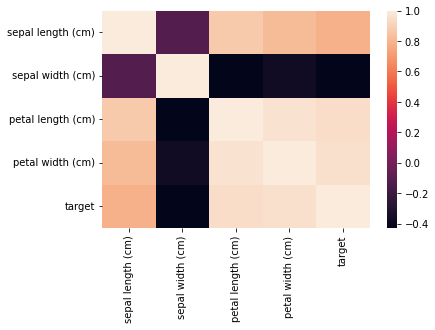

In [21]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values)
plt.show()

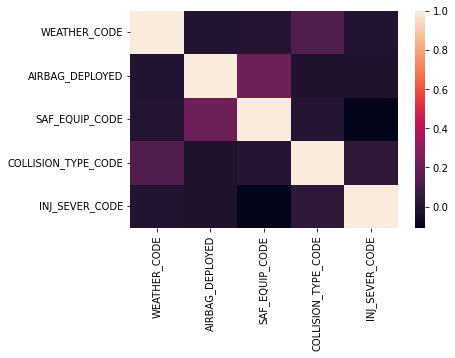

In [22]:
#######################################################
# TODO: Visualize the dataset
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

feature_names = [i for i in columns]
label_name = ['INJ_SEVER_CODE']
df = pd.DataFrame(data= np.c_[X, y],
                     columns= feature_names + label_name)
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values)
plt.show()
#######################################################

#### 11) What insights do you gain from this visualization about your dataset?

<font color='blue'>
    From the visualization above, we can see that all features are not highly correlated to each other, which is good for our future training. It suggests that safety equipment is the least relevant feature to injury severeness while collision type is the most relevant one. However, all the Covariance($\text{ feature}_i$, $y$) are very small, which might cause some problems later in our training and explaining process.
</font>

## Part 3: Using your dataset

Things to do in this part:
1. Answer questions 12-13
2. Perform a train-test split
3. Train simple supervised learning algorithm on dataset

Now that you have created your dataset and explored some of its properties, you will use a supervised classifier to predict the outcome you definined in the problem statement. To evaluate how well this classifier predicts the outcomes, you will need to set some data aside for testing. First, you'll use sklearn to split the data into train and test sets, with 25% of the data reserved for testing.

In [23]:
from sklearn.model_selection import train_test_split 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nTesting examples{ {X_test.shape[0]}}')

Training examples: 1500
Testing examples{500}


Now, we'll save your train and test sets. Together, these four files will make up the dataset you submit on Gradescope. 

In [24]:
import numpy as np 

np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

# zip together all components of your dataset
!zip homework1_dataset.zip X_train.csv X_test.csv y_train.csv y_test.csv

updating: X_train.csv (deflated 97%)
updating: X_test.csv (deflated 97%)
updating: y_train.csv (deflated 98%)
updating: y_test.csv (deflated 98%)


Now, let's train some classifiers or regression models. You are encouraged to try out multiple different algorithms, but only one is required. You are also encouraged to use popular packages such as [sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model); you are not expected to implement any of these algorithms yourself. We have included sklearn's Logistic Regression and Linear Regression algorithms below as examples.
<br /><br />
Consider trying the following algorithms:
<br />
Classification: SVM, Decision Tree, Random Forest
<br />
Regression: Lasso, ridge regression

In [25]:
# # If you have a classification problem, here is how to train a Logistic Regression classifier

# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# y_hat = clf.predict(X_test)
# accuracy = clf.score(X_test, y_test)
# print(f'model accuracy is {accuracy}')

# # If you have a regression problem, here is how to train a Linear Regression classifier

# from sklearn.linear_model import LinearRegression

# reg = LinearRegression().fit(X_train, y_train)
# y_hat = reg.predict(X_test)
# r_squared = reg.score(X_test, y_test)
# print(f'Goodness of fit given by coefficient of determination is {r_squared}')

#######################################################
# TODO: Train at least one simple supervised learning algorithm on your dataset
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=2000, random_state=0).fit(X_train, y_train.ravel())
y_hat = clf.predict(X_test)
accuracy = clf.score(X_test, y_test.ravel())
print(f'Model accuracy is {accuracy}')
print(columns)
print(clf.coef_)
#######################################################

Model accuracy is 0.804
Index(['WEATHER_CODE', 'AIRBAG_DEPLOYED', 'SAF_EQUIP_CODE',
       'COLLISION_TYPE_CODE'],
      dtype='object')
[[ 0.04840997  0.0432272   0.03382206  0.00381103]
 [ 0.04642437  0.03318247  0.02487327  0.00636507]
 [ 0.0545232   0.03852909  0.01838827  0.00559694]
 [-0.20007425  0.06568584  0.01538907  0.01547785]
 [ 0.05071672 -0.1806246  -0.09247269 -0.0312509 ]]


#### 12) How can you meaningfully evaluate results?  How was the performance of your model: did it meee?
*Note:* if you trained more than one model above, you only need to answer this question for one of them.

<font color='blue'>
    From the scores of the train and coefficient of the features in the decision function, we could tell that in fatal accident(class 5), weather condition plays an very important role, while other features seems not very helpful, since they are negative. <br/>In minor injury(class 2-3: non-incapacitating injury and possible incapacitating injury), weather condition, airbag and safety equipment have relatively same weights. <br/>In class 4, which represents incapacitating/disable injury, safety equipment such as seat belt and airbag plays an very important role in protecting ourselves from getting injured. <br/>In conclusion, while under inevitable condition such as bad weather, seat belt and airbag cannot prevent us from fatal dangerous, in most incapacitating/disable injury, seat belt and air bag play significant roles in protecting our safety. 
</font>

#### 13) In creating your dataset, what discussions did you have about the ethical implications of what you were collecting? Are there any potential issues with fairness?

<font color='blue'>
    I don't see any obvious or major ethical problems in my dataset. <br/>However, in the raw data, I do see a lot of confidential data such as county, sex and car types, which might cause bias in the society. For example, some people might use these data to arouse hateful comments towards certain group or area of people, or some people might use it to do advertisement about certain type/brand of car to gain profits. 
</font>

## Submit
Great work! You're all done.

Make sure to submit this Python notebook (as a PDF) and the dataset you created as a zip file. See the homework writeup for directions.